In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib

In [2]:
%matplotlib inline
# Always make it pretty.
plt.style.use('ggplot')
font = {'weight': 'bold',
        'size':   16}
plt.rc('font', **font)

In [3]:
df_national_official = pd.read_csv('data/national_cdc_pandas_df.csv', index_col=0)

In [4]:
df_states_official = pd.read_csv('data/states_cdc_pandas_df.csv', index_col=0)

### Total Deaths by Year - Bar

In [5]:
df_national_official.head()

,Area,Season,Week,Threshold,Baseline,Percent_p_i,Num_influenza_deaths,Num_pneumonia_deaths,Total_deaths,Percent_complete,Calendar_year,Population,Deaths_per_hund_thou
0,National,2013-14,40,0.068,0.064,0.066,3,3140,47492,0.998,2013,315993715,15.029413
1,National,2013-14,41,0.069,0.065,0.067,12,3135,47304,0.994,2013,315993715,14.969918
2,National,2013-14,42,0.070,0.066,0.068,11,3216,47602,1.000,2013,315993715,15.064224
3,National,2013-14,43,0.071,0.067,0.066,11,3151,47746,1.000,2013,315993715,15.109794
4,National,2013-14,44,0.072,0.068,0.067,12,3271,48777,1.000,2013,315993715,15.436067


In [6]:
annual_deaths = df_national_official.groupby('Calendar_year').sum()[['Total_deaths']]

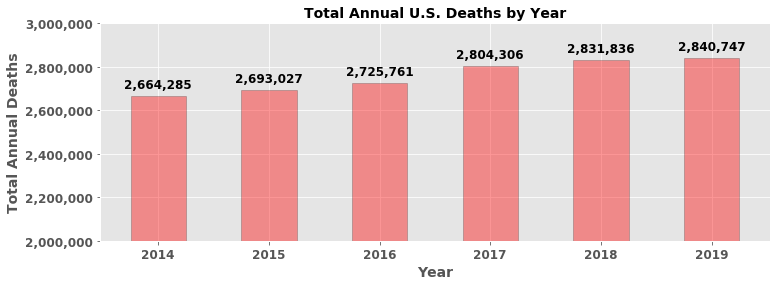

In [7]:
fig, ax = plt.subplots(figsize =(12,4))

x = annual_deaths.index[1:7]
y = annual_deaths.Total_deaths[1:7]

ax.bar(x, y, width = 0.5, align = 'center', color='red', edgecolor='black', alpha = 0.4)


ax.set_title("Total Annual U.S. Deaths by Year", fontsize = 14, fontweight="bold")
ax.set_xlabel("Year", fontsize = 14, fontweight="bold")
ax.set_ylabel("Total Annual Deaths", fontsize = 14, fontweight="bold")
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))



def add_value_labels(ax, spacing=5):
    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = format(int(y_value),',')

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va, size = 12)                      # Vertically align label differently for
                                        # positive and negative values.


# Call the function above. All the magic happens there.
add_value_labels(ax)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

ax.set_ylim([2000000,3000000])
plt.show()

In [8]:
weekly_deaths = df_national_official.groupby('Calendar_year').mean()[['Total_deaths','Percent_p_i']]

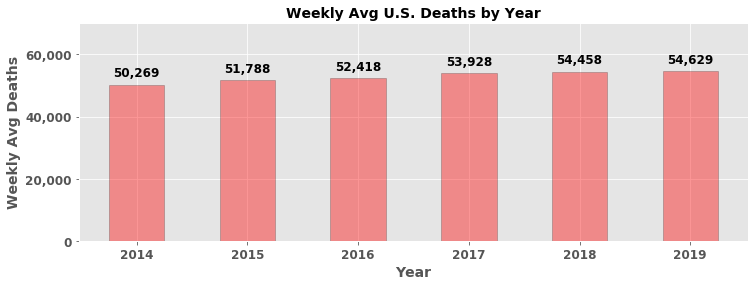

In [9]:
fig, ax = plt.subplots(figsize =(12,4))

x = weekly_deaths.index[1:7]
y = weekly_deaths.Total_deaths[1:7]

ax.bar(x, y, width = 0.5, align = 'center', color='red', edgecolor='black', alpha = 0.4)


ax.set_title("Weekly Avg U.S. Deaths by Year", fontsize = 14, fontweight="bold")
ax.set_xlabel("Year", fontsize = 14, fontweight="bold")
ax.set_ylabel("Weekly Avg Deaths", fontsize = 14, fontweight="bold")
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))



def add_value_labels(ax, spacing=5):
    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = format(int(y_value),',')

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va, size = 12)                      # Vertically align label differently for
                                        # positive and negative values.


# Call the function above. All the magic happens there.
add_value_labels(ax)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

ax.set_ylim([0,70000])
plt.show()

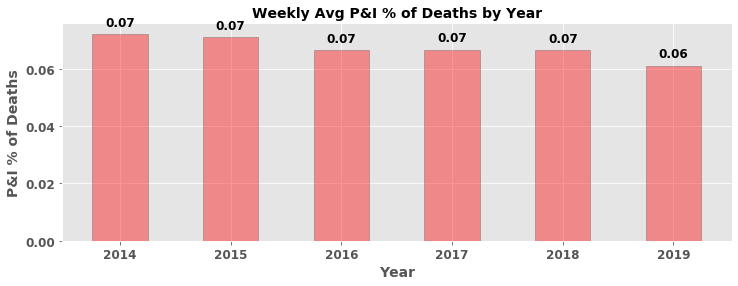

In [10]:
fig, ax = plt.subplots(figsize =(12,4))

x = weekly_deaths.index[1:7]
y = weekly_deaths.Percent_p_i[1:7]

ax.bar(x, y, width = 0.5, align = 'center', color='red', edgecolor='black', alpha = 0.4)


ax.set_title("Weekly Avg P&I % of Deaths by Year", fontsize = 14, fontweight="bold")
ax.set_xlabel("Year", fontsize = 14, fontweight="bold")
ax.set_ylabel("P&I % of Deaths", fontsize = 14, fontweight="bold")

vals = ax.get_xticks()

def add_value_labels(ax, spacing=5):
    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.2f}".format(y_value)
        

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va, size = 12)                      # Vertically align label differently for
                                        # positive and negative values.


# Call the function above. All the magic happens there.
add_value_labels(ax)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# ax.set_ylim([0,70000])
plt.show()

### Pct of Deaths by States - Vertical Bar

In [11]:
df_states_official.head()

,Season,Week,Percent_p_i,Num_influenza_deaths,Num_pneumonia_deaths,Total_deaths,Percent_complete,Calendar_year,State,Population,Deaths_per_hund_thou
0,2012-13,1,0.088,4,73,874,0.9,2013,Alabama,4830081,18.094935
1,2012-13,2,0.093,12,100,1200,1.0,2013,Alabama,4830081,24.844304
2,2012-13,3,0.100,8,102,1105,1.0,2013,Alabama,4830081,22.877463
3,2012-13,4,0.098,4,100,1060,1.0,2013,Alabama,4830081,21.945802
4,2012-13,5,0.083,2,83,1026,1.0,2013,Alabama,4830081,21.241880


In [12]:
mask = df_states_official['Calendar_year'] == 2019

In [13]:
total_deaths_2019 = df_states_official[mask].sum()['Total_deaths']

In [14]:
states_2019 = df_states_official[mask].groupby('State').sum()['Total_deaths'].sort_values(ascending = False)

In [15]:
states_2019_df = pd.DataFrame(states_2019)

In [16]:
states_2019_df['%_Total_deaths'] = states_2019_df['Total_deaths']/total_deaths_2019

In [17]:
states_2019_df.head()

,Total_deaths,%_Total_deaths
State,,
California,268752,0.094606
Florida,206410,0.072660
Texas,202631,0.071330
New York,155704,0.054811
Pennsylvania,132179,0.046530


In [18]:
labels = states_2019_df.index[0:12]
state_deaths = states_2019_df['Total_deaths'][0:12]
state_death_pct = states_2019_df['%_Total_deaths'][0:12]

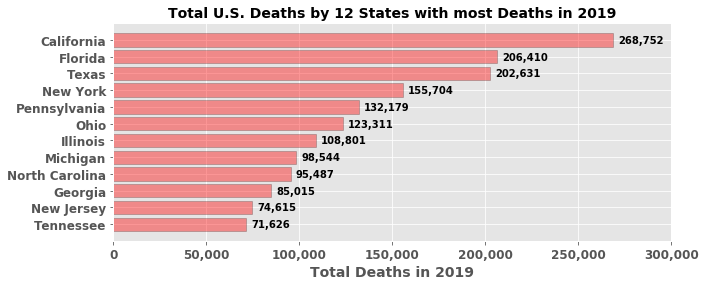

In [53]:
fig, ax = plt.subplots(figsize =(10,4))


y = np.arange(len(labels))


ax.barh(y, state_deaths, align = 'center', color='red', edgecolor='black', alpha = 0.4)
ax.set_yticks(y)
ax.set_yticklabels(labels)
ax.invert_yaxis()

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


ax.set_title("Total U.S. Deaths by 12 States with most Deaths in 2019", fontsize = 14, fontweight="bold")
ax.set_xlabel("Total Deaths in 2019", fontsize = 14, fontweight="bold")
ax.get_xaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

rects = ax.patches

# For each bar: Place a label
for rect in rects:
    # Get X and Y placement of label from rect.
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2

    # Number of points between bar and label. Change to your liking.
    space = 5
    # Vertical alignment for positive values
    ha = 'left'

    # If value of bar is negative: Place label left of bar
    if x_value < 0:
        # Invert space to place label to the left
        space *= -1
        # Horizontally align label at right
        ha = 'right'

    # Use X value as label and format number with one decimal place
    label = format(int(x_value),',')

    # Create annotation
    plt.annotate(
        label,                      # Use `label` as label
        (x_value, y_value),         # Place label at end of the bar
        xytext=(space, 0),          # Horizontally shift label by `space`
        textcoords="offset points", # Interpret `xytext` as offset in points
        va='center',                # Vertically center label
        ha=ha, size =10)                      # Horizontally align label differently for
                                    # positive and negative values.



ax.set_xlim([0,300000])

plt.show()

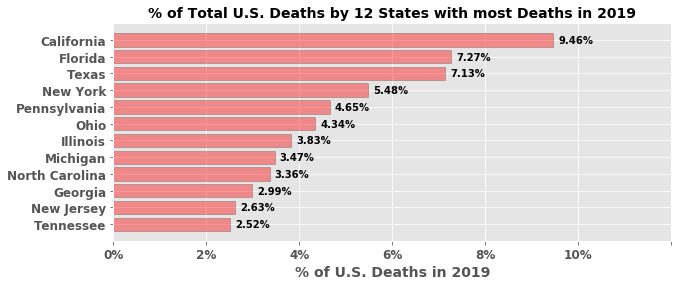

<Figure size 432x288 with 0 Axes>

In [56]:
fig, ax = plt.subplots(figsize =(10,4))


y = np.arange(len(labels))


ax.barh(y, state_death_pct, align = 'center', color='red', edgecolor='black', alpha = 0.4)
ax.set_yticks(y)
ax.set_yticklabels(labels)
vals = ax.get_xticks()
ax.set_xticklabels(['{:,.0%}'.format(x) for x in vals])

ax.invert_yaxis()

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


ax.set_title("% of Total U.S. Deaths by 12 States with most Deaths in 2019", fontsize = 14, fontweight="bold")
ax.set_xlabel("% of U.S. Deaths in 2019", fontsize = 14, fontweight="bold")
# ax.get_xaxis().set_major_formatter(
#     matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

rects = ax.patches

# For each bar: Place a label
for rect in rects:
    # Get X and Y placement of label from rect.
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2

    # Number of points between bar and label. Change to your liking.
    space = 5
    # Vertical alignment for positive values
    ha = 'left'

    # If value of bar is negative: Place label left of bar
    if x_value < 0:
        # Invert space to place label to the left
        space *= -1
        # Horizontally align label at right
        ha = 'right'

    # Use X value as label and format number with one decimal place
    label = "{:,.2%}".format(x_value)

    # Create annotation
    plt.annotate(
        label,                      # Use `label` as label
        (x_value, y_value),         # Place label at end of the bar
        xytext=(space, 0),          # Horizontally shift label by `space`
        textcoords="offset points", # Interpret `xytext` as offset in points
        va='center',                # Vertically center label
        ha=ha, size =10)                      # Horizontally align label differently for
                                    # positive and negative values.



ax.set_xlim([0,.12])

plt.show()
plt.tight_layout()

In [21]:
df_states_official.head()

,Season,Week,Percent_p_i,Num_influenza_deaths,Num_pneumonia_deaths,Total_deaths,Percent_complete,Calendar_year,State,Population,Deaths_per_hund_thou
0,2012-13,1,0.088,4,73,874,0.9,2013,Alabama,4830081,18.094935
1,2012-13,2,0.093,12,100,1200,1.0,2013,Alabama,4830081,24.844304
2,2012-13,3,0.100,8,102,1105,1.0,2013,Alabama,4830081,22.877463
3,2012-13,4,0.098,4,100,1060,1.0,2013,Alabama,4830081,21.945802
4,2012-13,5,0.083,2,83,1026,1.0,2013,Alabama,4830081,21.241880


In [22]:
mask = (df_states_official['Percent_complete'] == 1.0) & (df_states_official['Calendar_year'] == 2019) 

In [23]:
states_2019_wk_avg = df_states_official[mask].groupby('State').mean()['Total_deaths'].sort_values(ascending = False)

In [24]:
labels = states_2019_wk_avg.index[0:12]
state_death_avgs = states_2019_wk_avg.iloc[0:12]


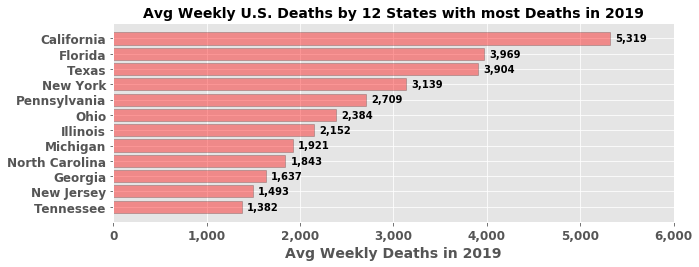

In [57]:
fig, ax = plt.subplots(figsize =(10,4))


y = np.arange(len(labels))


ax.barh(y, state_death_avgs, align = 'center', color='red', edgecolor='black', alpha = 0.4)
ax.set_yticks(y)
ax.set_yticklabels(labels)
ax.invert_yaxis()

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


ax.set_title("Avg Weekly U.S. Deaths by 12 States with most Deaths in 2019", fontsize = 14, fontweight="bold")
ax.set_xlabel("Avg Weekly Deaths in 2019", fontsize = 14, fontweight="bold")
ax.get_xaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

rects = ax.patches

# For each bar: Place a label
for rect in rects:
    # Get X and Y placement of label from rect.
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2

    # Number of points between bar and label. Change to your liking.
    space = 5
    # Vertical alignment for positive values
    ha = 'left'

    # If value of bar is negative: Place label left of bar
    if x_value < 0:
        # Invert space to place label to the left
        space *= -1
        # Horizontally align label at right
        ha = 'right'

    # Use X value as label and format number with one decimal place
    label = format(int(x_value),',')

    # Create annotation
    plt.annotate(
        label,                      # Use `label` as label
        (x_value, y_value),         # Place label at end of the bar
        xytext=(space, 0),          # Horizontally shift label by `space`
        textcoords="offset points", # Interpret `xytext` as offset in points
        va='center',                # Vertically center label
        ha=ha, size =10)                      # Horizontally align label differently for
                                    # positive and negative values.



ax.set_xlim([0,6000])
plt.tight_layout()
plt.show()


### Avg Deaths per Week by year - Line Graph

In [26]:
df_national_official.head()

,Area,Season,Week,Threshold,Baseline,Percent_p_i,Num_influenza_deaths,Num_pneumonia_deaths,Total_deaths,Percent_complete,Calendar_year,Population,Deaths_per_hund_thou
0,National,2013-14,40,0.068,0.064,0.066,3,3140,47492,0.998,2013,315993715,15.029413
1,National,2013-14,41,0.069,0.065,0.067,12,3135,47304,0.994,2013,315993715,14.969918
2,National,2013-14,42,0.070,0.066,0.068,11,3216,47602,1.000,2013,315993715,15.064224
3,National,2013-14,43,0.071,0.067,0.066,11,3151,47746,1.000,2013,315993715,15.109794
4,National,2013-14,44,0.072,0.068,0.067,12,3271,48777,1.000,2013,315993715,15.436067


In [27]:
years = list(df_national_official['Calendar_year'].unique())
years.sort()


In [28]:
colors = ['lightgrey','lightblue','yellowgreen','tan','gold','darkorange','red']

(40000, 70000)

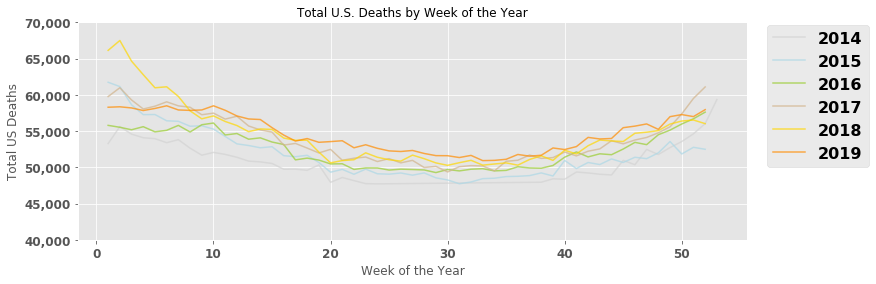

In [29]:
fig, ax = plt.subplots(figsize=(12, 4))


for year,color in zip(years[1:7],colors[0:6]):
    mask = (df_national_official['Calendar_year'] == year) & (df_national_official['Percent_complete'] == 1)
    df = df_national_official[mask].sort_values('Week')
    x = df['Week']
    y = df['Total_deaths']
    
    if year == 2020:
        ax.plot(x,y, label = year, color = color,alpha =0.8, linewidth=3, zorder =2)
        ax.scatter(x, y, s=30, color=color, zorder=1)
    else:
        ax.plot(x,y, label = year, color = color, alpha =0.7, zorder =1)

    
plt.legend(bbox_to_anchor=(1.05, 0.9),
           bbox_transform=plt.gcf().transFigure)
# ax.axhline(y=50000, color='grey', linestyle='--')

ax.set_title("Total U.S. Deaths by Week of the Year", fontsize = 12)
ax.set_xlabel("Week of the Year", fontsize = 12)
ax.set_ylabel("Total US Deaths", fontsize = 12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

ax.set_ylim([40000,70000])

In [30]:
mask = (df_national_official['Percent_complete'] == 1) & (df_national_official['Calendar_year'] == 2019)
median_wkly_deaths_2019 = int(df_national_official[mask].median()['Total_deaths'])

(40000, 70000)

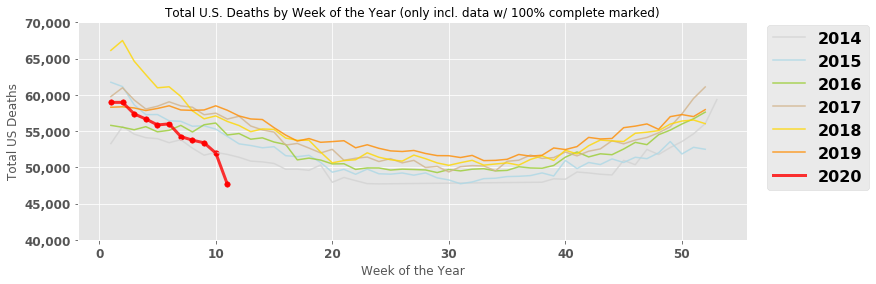

In [31]:
fig, ax = plt.subplots(figsize=(12, 4))


for year,color in zip(years[1:],colors):
    mask = (df_national_official['Calendar_year'] == year) & (df_national_official['Percent_complete'] == 1)
    df = df_national_official[mask].sort_values('Week')
    x = df['Week']
    y = df['Total_deaths']
    
    if year == 2020:
        ax.plot(x,y, label = year, color = color,alpha =0.8, linewidth=3, zorder =2)
        ax.scatter(x, y, s=30, color=color, zorder=1)
    else:
        ax.plot(x,y, label = year, color = color, alpha =0.8, zorder =1)

    
plt.legend(bbox_to_anchor=(1.05, 0.9),
           bbox_transform=plt.gcf().transFigure)
# ax.axhline(median_wkly_deaths, color='grey', linestyle='--')

ax.set_title("Total U.S. Deaths by Week of the Year (only incl. data w/ 100% complete marked)", fontsize = 12)
ax.set_xlabel("Week of the Year", fontsize = 12)
ax.set_ylabel("Total US Deaths", fontsize = 12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

ax.set_ylim([40000,70000])



### Bar Charts for 2020 vs. prior years by Week --> Hypothesis Tests

In [32]:
df_national_official.head()

,Area,Season,Week,Threshold,Baseline,Percent_p_i,Num_influenza_deaths,Num_pneumonia_deaths,Total_deaths,Percent_complete,Calendar_year,Population,Deaths_per_hund_thou
0,National,2013-14,40,0.068,0.064,0.066,3,3140,47492,0.998,2013,315993715,15.029413
1,National,2013-14,41,0.069,0.065,0.067,12,3135,47304,0.994,2013,315993715,14.969918
2,National,2013-14,42,0.070,0.066,0.068,11,3216,47602,1.000,2013,315993715,15.064224
3,National,2013-14,43,0.071,0.067,0.066,11,3151,47746,1.000,2013,315993715,15.109794
4,National,2013-14,44,0.072,0.068,0.067,12,3271,48777,1.000,2013,315993715,15.436067


In [33]:
week_labels = list(df_national_official['Week'].unique())

In [34]:
week_labels.sort()
weeks_to_11 = week_labels[:11]

In [35]:
death_lst = []
year_lst = []
week_lst = []

for i in range(1,len(weeks_to_11[0:11])+1):
    for year in years[1:]:
        mask = (df_national_official['Week'] == i) & (df_national_official['Calendar_year'] == year)
        df = df_national_official[mask]
        death_lst.append(df['Total_deaths'].iloc[0])
        year_lst.append(year)
        week_lst.append(i)

In [36]:
y_w_d = []
for y, w, d in zip(year_lst,week_lst,death_lst):
    y_w_d.append((y,w,d))

In [37]:
deaths_2014 = []
deaths_2015 = []
deaths_2016 = []
deaths_2017 = []
deaths_2018 = []
deaths_2019 = []
deaths_2020 = [] 

for y,w,d in y_w_d:
    if y == 2014:
        deaths_2014.append(d)
    elif y == 2015:
        deaths_2015.append(d)
    elif y == 2016:
        deaths_2016.append(d)
    elif y == 2017:
        deaths_2017.append(d)
    elif y == 2018:
        deaths_2018.append(d)
    elif y == 2019:
        deaths_2019.append(d)
    elif y == 2020:
        deaths_2020.append(d)

In [38]:
deaths_2020

[58961, 58962, 57371, 56666, 55849, 55992, 54246, 53745, 53382, 51978, 47655]

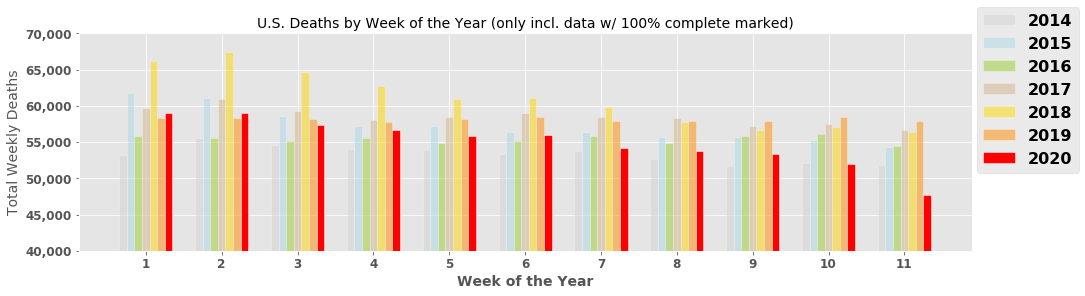

In [39]:
fig, ax = plt.subplots(figsize = (16,4))

# set width of bar
barWidth = 0.10
 
# set height of bar
bars1 = deaths_2014
bars2 = deaths_2015
bars3 = deaths_2016
bars4 = deaths_2017
bars5 = deaths_2018
bars6 = deaths_2019
bars7 = deaths_2020


weeks = weeks_to_11

# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]
r6 = [x + barWidth for x in r5]
r7 = [x + barWidth for x in r6]
 

colors = ['lightgrey','lightblue','yellowgreen','tan','gold','darkorange','red']

# Make the plot
ax.bar(r1, bars1,  width=barWidth, edgecolor='white', label='2014', color = colors[0], alpha = 0.5)
ax.bar(r2, bars2,  width=barWidth, edgecolor='white', label='2015', color = colors[1], alpha = 0.5)
ax.bar(r3, bars3,  width=barWidth, edgecolor='white', label='2016', color = colors[2], alpha = 0.5)
ax.bar(r4, bars4,  width=barWidth, edgecolor='white', label='2017', color = colors[3], alpha = 0.5)
ax.bar(r5, bars5,  width=barWidth, edgecolor='white', label='2018', color = colors[4], alpha = 0.5)
ax.bar(r6, bars6,  width=barWidth, edgecolor='white', label='2019', color = colors[5], alpha = 0.5)
ax.bar(r7, bars7,  width=barWidth, edgecolor='white', label='2020', color = colors[6] ,alpha = 1.0)


 
# Add xticks on the middle of the group bars
plt.xlabel('Week of Year', fontweight='bold')
plt.xticks([r + barWidth+0.2 for r in range(len(bars1))], weeks)
 
# Create legend & Show graphic
plt.legend(bbox_to_anchor=(1, 1),
           bbox_transform=plt.gcf().transFigure)




ax.set_title("U.S. Deaths by Week of the Year (only incl. data w/ 100% complete marked)", fontsize = 14)
ax.set_xlabel("Week of the Year", fontsize = 14)
ax.set_ylabel("Total Weekly Deaths", fontsize = 14)

ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax.set_ylim([40000,70000])
plt.show()

### Distribution of Deaths by Week

In [40]:
deaths_2020

[58961, 58962, 57371, 56666, 55849, 55992, 54246, 53745, 53382, 51978, 47655]

In [41]:
deaths_2019

[58289, 58351, 58193, 57834, 58122, 58489, 57915, 57856, 57915, 58488, 57869]

In [42]:
for nd, d in zip(deaths_2020,deaths_2019):
    print(nd-d)

672
611
-822
-1168
-2273
-2497
-3669
-4111
-4533
-6510
-10214


In [43]:
weekly_deaths = []

for y,w,d in y_w_d:
    weekly_deaths.append(d)

In [44]:
len(weekly_deaths)

77

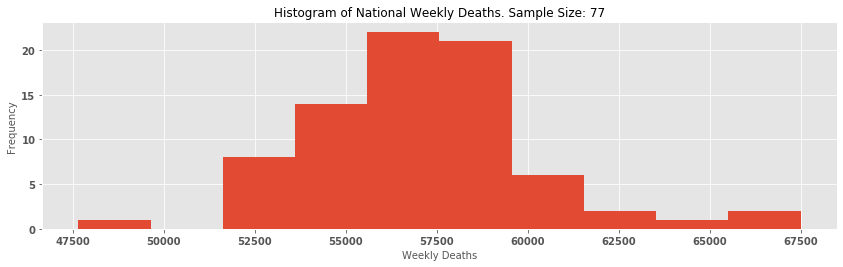

In [45]:
fig, ax = plt.subplots(figsize=(12, 4))

ax.hist(weekly_deaths)
ax.set_title(f'Histogram of National Weekly Deaths. Sample Size: {len(weekly_deaths)}',fontsize = 12)
ax.set_xlabel("Weekly Deaths", fontsize = 10)
ax.set_ylabel("Frequency", fontsize = 10)
ax.tick_params(axis = 'x', labelsize = 10)
ax.tick_params(axis = 'y', labelsize = 10)
    
fig.tight_layout()

In [46]:
df_states_official.head()

,Season,Week,Percent_p_i,Num_influenza_deaths,Num_pneumonia_deaths,Total_deaths,Percent_complete,Calendar_year,State,Population,Deaths_per_hund_thou
0,2012-13,1,0.088,4,73,874,0.9,2013,Alabama,4830081,18.094935
1,2012-13,2,0.093,12,100,1200,1.0,2013,Alabama,4830081,24.844304
2,2012-13,3,0.100,8,102,1105,1.0,2013,Alabama,4830081,22.877463
3,2012-13,4,0.098,4,100,1060,1.0,2013,Alabama,4830081,21.945802
4,2012-13,5,0.083,2,83,1026,1.0,2013,Alabama,4830081,21.241880


In [47]:
week_labels = list(df_states_official['Week'].unique())
week_labels.sort()
weeks_to_11 = week_labels[:11]

In [48]:
labels = states_2019_df.index[0:12]
top_states_list = list(labels)
len(top_states_list)

12

In [49]:
top_states_list[0:8]

['California',
 'Florida',
 'Texas',
 'New York',
 'Pennsylvania',
 'Ohio',
 'Illinois',
 'Michigan']

In [50]:
state_dict = {}
for state in top_states_list[0:8]:
    state_death_lst = []
    for year in years[1:]: 
        for week in weeks_to_11[0:11]:
            mask = (df_states_official['Week'] == week) & (df_states_official['Calendar_year'] == year)\
            & (df_states_official['State'] == state) & (df_states_official['Percent_complete'] == 1) 
            if len(df_states_official[mask]['Total_deaths']) == 0: # checks to see if criteria above is fit or not, if not, pass this week
                continue 
            else:
                weekly_deaths = df_states_official[mask]['Total_deaths'].iloc[0]
                state_death_lst.append(weekly_deaths)
    state_dict[state] = state_death_lst
    state_death_lst = []
    

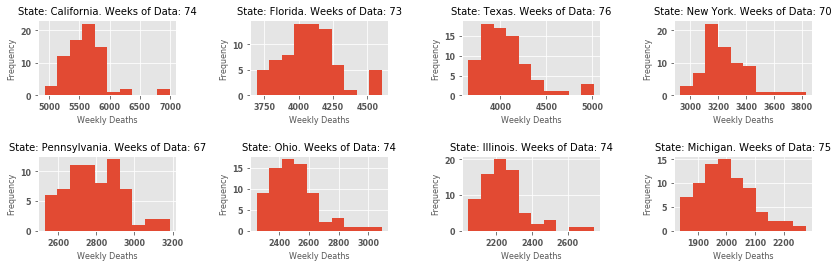

In [51]:

fig, axs = plt.subplots(2, 4, figsize=(12, 4))

for idx, (ax, state) in enumerate(zip(axs.flatten(), top_states_list[0:8])):
    ax.hist(state_dict[state])
    ax.set_title(f'State: {state}. Weeks of Data: {len(state_dict[state])}',fontsize = 10)

    ax.set_xlabel("Weekly Deaths", fontsize = 8)
    ax.set_ylabel("Frequency", fontsize = 8)
    ax.tick_params(axis = 'x', labelsize = 8)
    ax.tick_params(axis = 'y', labelsize = 8)
    

# plt.grid(true)
fig.tight_layout()

In [52]:
week_labels = list(df_national_official['Week'].unique())
week_labels.sort()
weeks_to_11 = week_labels[:11]

### % Flu & Pneumonia Deaths by Week --> Hypothesis Tests

### Distribution of % Flu & Pneumonia Deaths 

### Covid Death Rise

### % Covid Death compared to %Flu & Pneumonia